# Car Insurance Risk Project 🚘

The idea of this project is to predict the insurance risk rating of a car as well as characterizing the 
different segments of the population.  

### 1. EDA
To begin with the project, we'll perform data cleaning and exploratory data analysis (EDA) on the provided dataset. This will include checking for data quality issues, visualizing the data, and extracting insights from it.

### 1.1 Data Quality

In this section, the focus will be on assessing the integrity of the data, ensuring that it is clean and consistent for analysis. 
Steps will include:

- Identifying Missing Data: We will search for any missing or incomplete data points and handle them appropriately (e.g., replacing them with median values or removing affected rows).
- Checking for Duplicates: Any duplicated rows will be identified and removed to prevent bias in the analysis.
- Data Type Correction: Ensuring that each column has the appropriate data type, converting strings to numbers where necessary.
- Outliers: We will identify and handle outliers that could skew the analysis using visualization techniques such as box plots.

1.1.1 Importing Libraries and Loading the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


1.1.2 Data Collection and information

In [2]:
def import_data(file_path, columns):
    """
    Function woth the responsibility to import the data from the file.
    """
    try:
        data = pd.read_csv(file_path, names=columns)
        return data
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Constants
file_path = '../data/imports-85.csv'
columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
              'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
                'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
                'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

# Import the data
df = import_data(file_path, columns)

# Showing or Checking results
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
def dfInformation(dataframe):
    """
    Gets the initial information of the Dataset, the number of records, number of variables, non-null objects and data type.

    Args:
        dataframe (DataFrame): Source dataset.
    
    Returns:
        void: A range indes conforma by float64(2), int64(1), object(6)

    Raises:
        TypeError: If the dataframe is not a DataFrame.
    """
    dataframe.info()
dfInformation(df)
# Getting the shape of the dataset
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

(205, 26)

In [11]:
# Getting all the unique values in the make column
df['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

1.1.3 Identifying Missing Data

In [12]:
def check(dataframe):
    """
    Gets the amount of null data and unique is calculated

    Args:
        dataframe (DataFrame): Source dataset.

    Returns:
        DataFrame: A new Dataframe tha represents de amortized values of null and unique values for each column.

    Raises:
        TypeError: If the dataframe is not a DataFrame.
    """
    l=[]
    columns=dataframe.columns
    for col in columns:
        dtypes=dataframe[col].dtypes
        nunique=dataframe[col].nunique()
        sum_null=dataframe[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['Column','Types','Unique','Nulls']
    return df_check 
check(df)

,Column,Types,Unique,Nulls
0,symboling,int64,6,0
1,normalized-losses,object,52,0
2,make,object,22,0
3,fuel-type,object,2,0
4,aspiration,object,2,0
5,num-of-doors,object,3,0
6,body-style,object,5,0
7,drive-wheels,object,3,0
8,engine-location,object,2,0
9,wheel-base,float64,53,0


In [13]:
def checkDuplicates(dataframe):
    """
    Checks duplicated values for each column and amortized this count.

    Args:
        dataframe (DataFrame): Source dataset.

    Returns:
        int: The total of duplicated values in an specifica dataframe

    Raises:
        TypeError: If the dataframe is not a DataFrame.
    """
    return dataframe.duplicated().sum()
checkDuplicates(df)

np.int64(0)

All looks like there are no missing values in the dataset. However, we can see that some columns have special characters that need to be removed.

In [14]:
def removeSymbols(dataframe):
    """
    Removes the symbols from the dataset.

    Args:
        dataframe (DataFrame): Source dataset.

    Returns:
        DataFrame: A new Dataframe without the symbols.

    Raises:
        TypeError: If the dataframe is not a DataFrame.
    """
    dataframe = dataframe.replace('?', np.nan)
    return dataframe

# Removing the symbols
df = removeSymbols(df)

In [19]:
# Rechecking the data
df.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164,205,205,205,203,205,205,205,205.000000,...,205.000000,205,201,201,205.000000,203,203,205.000000,205.000000,201
unique,NaN,51,22,2,2,2,5,3,2,NaN,...,NaN,8,38,36,NaN,59,23,NaN,NaN,186
top,NaN,161,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,8921
freq,NaN,11,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,2
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


### 2. Data Visualization
Visualizations will help uncover relationships between car characteristics and insurance risk. The focus here includes:

- Distribution of Features: Visualizing the distribution of important car attributes (e.g., engine size, body style) using histograms and bar charts to understand their spread across the dataset.
- Correlations: Create a heatmap to identify how different features (e.g., engine size, fuel type, and price) are correlated with each other and with the insurance risk rating.
- Feature-Target Visualization: Use box plots and scatter plots to visually analyze how each feature relates to the car's risk rating, helping to identify patterns.

array([[<Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'wheel-base'}>,
        <Axes: title={'center': 'length'}>],
       [<Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'curb-weight'}>],
       [<Axes: title={'center': 'engine-size'}>,
        <Axes: title={'center': 'compression-ratio'}>,
        <Axes: title={'center': 'city-mpg'}>],
       [<Axes: title={'center': 'highway-mpg'}>, <Axes: >, <Axes: >]],
      dtype=object)

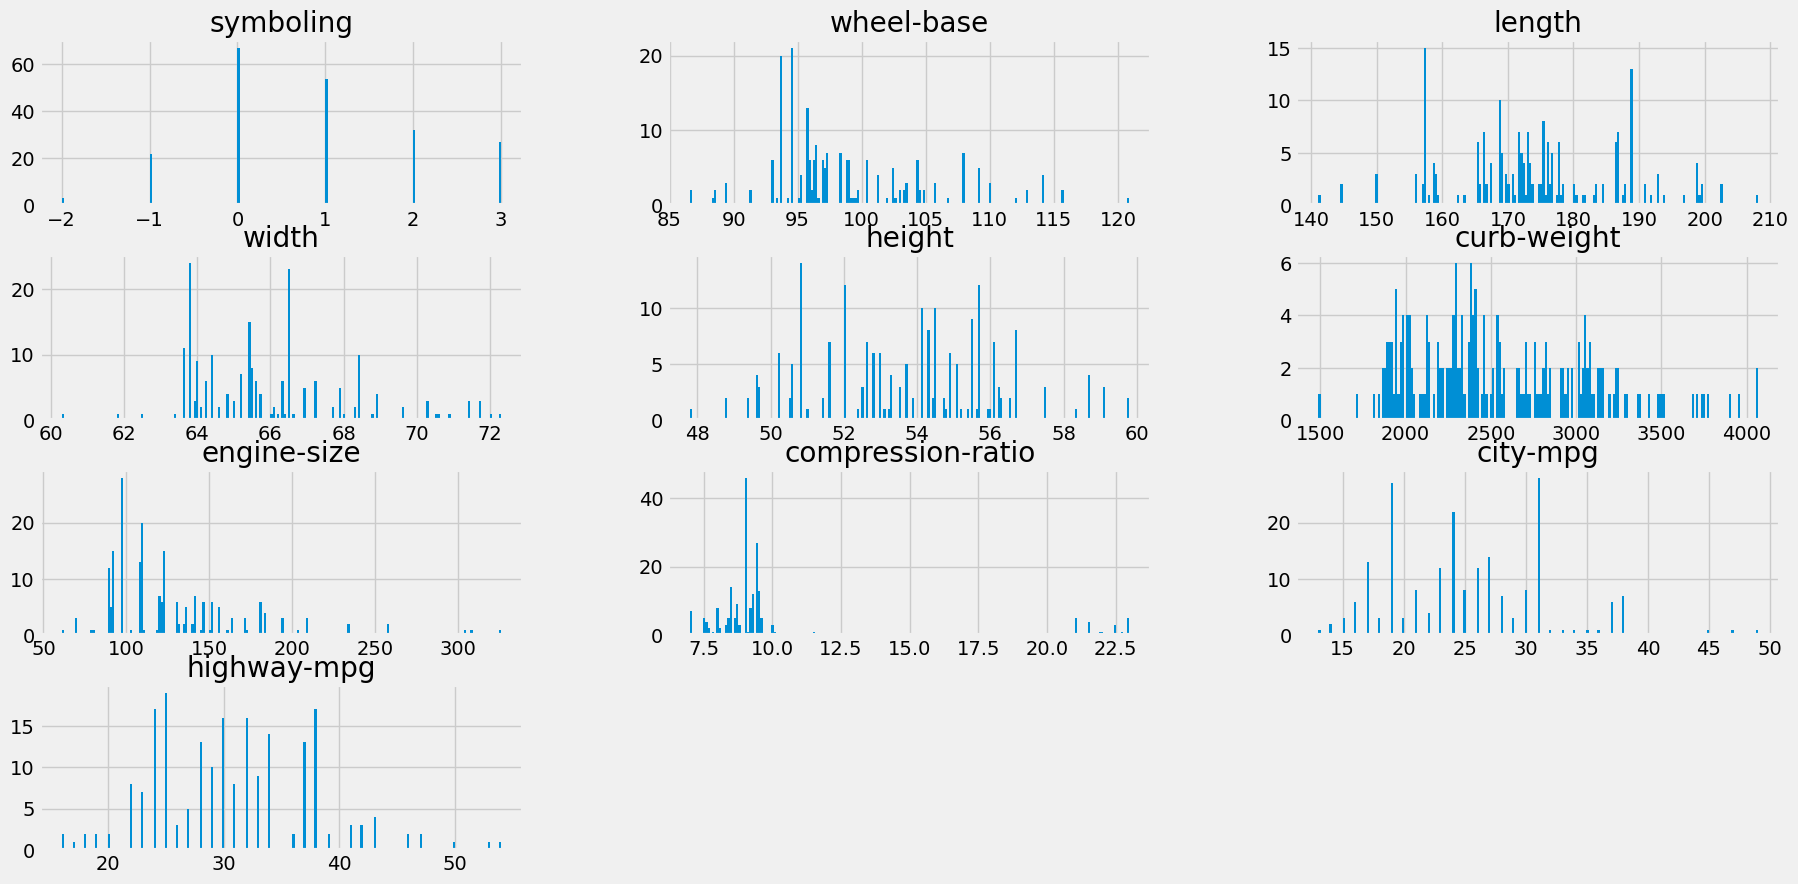

In [20]:
# Dataframe histogram
df.hist(bins=200,figsize=[20,10])

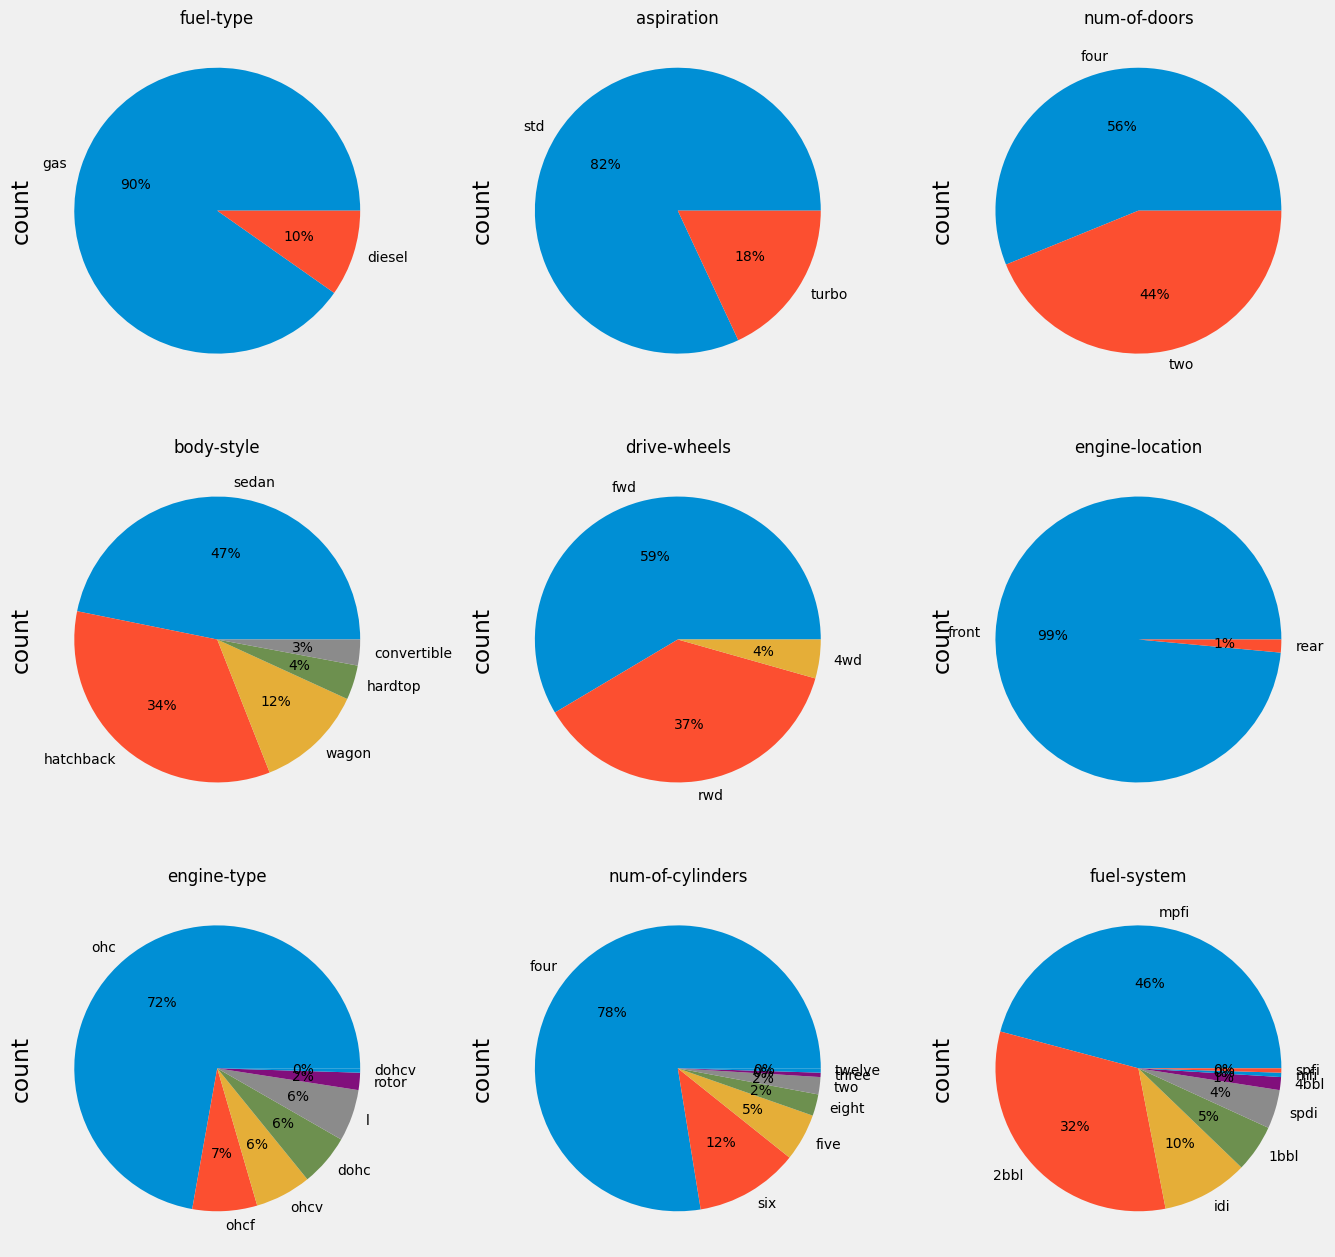

In [23]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

# Columns list
cols_list = ['fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']
# Pie plot
pie_plot(df, cols_list, 3, 3)

Text(0, 0.5, 'Count of Cars')

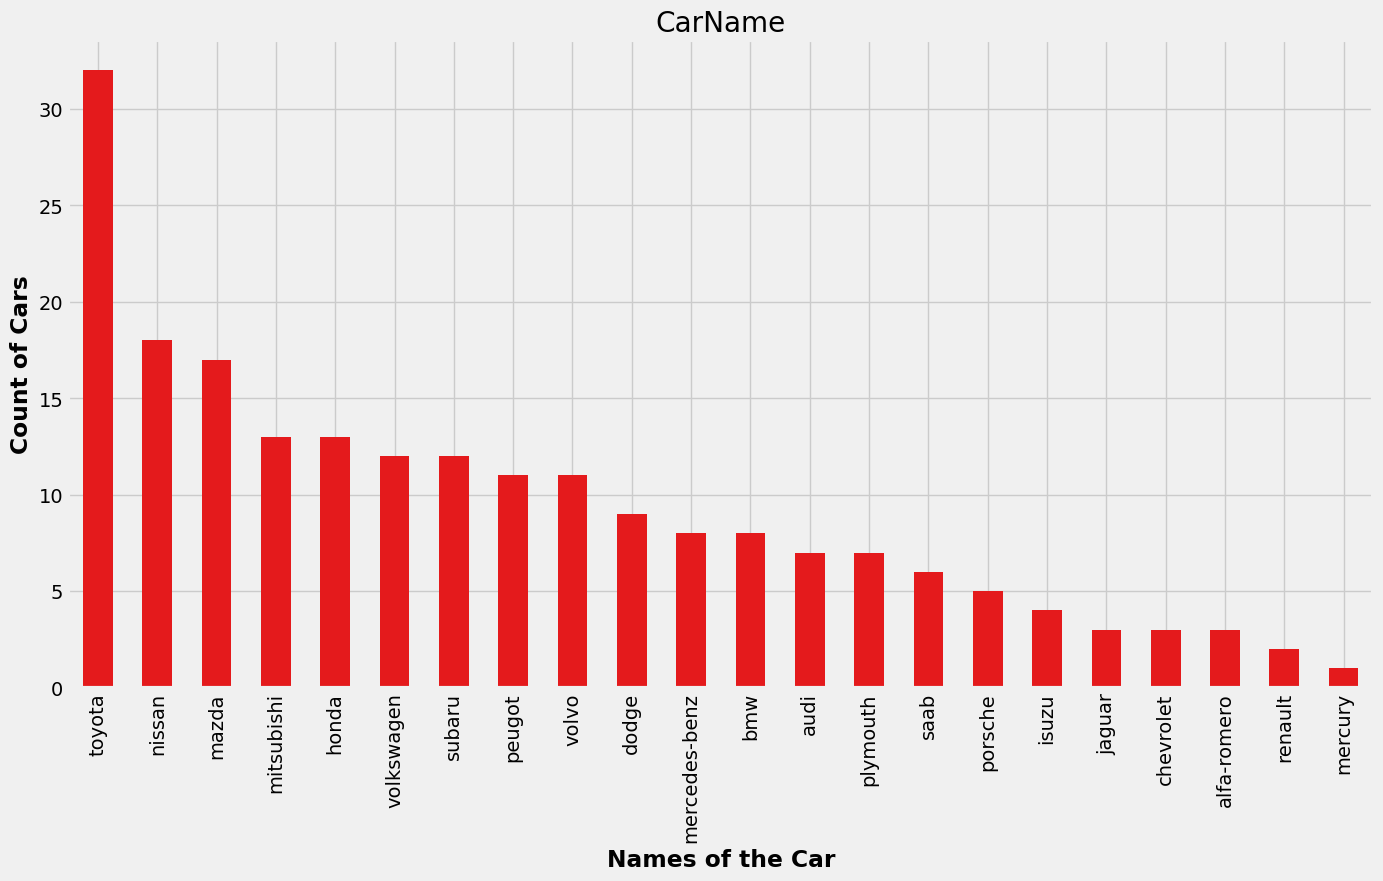

In [26]:
# Visualizing the different makes available

plt.rcParams['figure.figsize'] = [15,8]
ax=df['make'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
ax.title.set_text('CarName')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')

### 3. Extraction of Insights
This section focuses on extracting actionable insights to inform risk prediction and characterize segments. Steps include:

- Summary Statistics: Provide a summary of key features that influence risk rating, such as engine type, price, or drive wheels, to better understand typical car profiles and segments.
- Feature Importance for Risk Prediction: Identify which features are most significant in predicting the car's insurance risk rating using correlation and statistical tests.
- Segmentation of Population: Cluster the dataset into segments (e.g., based on car type, price range, or risk level) to characterize different population segments, helping insurers understand their customer base.